In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)
df = pd.read_csv("D:/telco_churn.csv")  

print("Shape:", df.shape)
df.head()



Shape: (5043, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [105]:
df.describe(include="all")

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5043.000000,5043,5043,5043,5043,5043,5043.000000,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038,5042
unique,NaN,5043,2,4,4,4,NaN,4,5,3,5,5,5,5,5,5,3,4,4,NaN,4870,4
top,NaN,7590-VHVEG,Male,False,False,False,NaN,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,NaN,20.450000762939453,False
freq,NaN,1,2559,2525,1538,2070,NaN,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,NaN,5,2219
mean,1305.651993,NaN,NaN,NaN,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,801.484415,NaN,NaN,NaN,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,630.000000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,1260.000000,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,1890.500000,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


In [107]:
missing = df.isna().sum().sort_values(ascending=False)
missing

OnlineBackup        651
StreamingMovies     651
StreamingTV         651
TechSupport         651
DeviceProtection    651
OnlineSecurity      651
MultipleLines       269
TotalCharges          5
Churn                 1
InternetService       0
PhoneService          0
customerID            0
tenure                0
Dependents            0
Partner               0
SeniorCitizen         0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
gender                0
Unnamed: 0            0
dtype: int64

In [109]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [111]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print(df[["MonthlyCharges", "TotalCharges"]].dtypes)
print("TotalCharges missing after conversion:", df["TotalCharges"].isna().sum())

MonthlyCharges    float64
TotalCharges      float64
dtype: object
TotalCharges missing after conversion: 8


In [113]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [115]:
print(df["Churn"].value_counts())
df["Churn"]=df["Churn"].astype(str).str.strip().str.lower()
mapping = {
    "yes": "Yes",
    "true": "Yes",
    "no": "No",
    "false": "No",'0':'No','1':"Yes"
}

df["Churn"] = df["Churn"].map(mapping)

# Verify
print(df["Churn"].value_counts())

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64
Churn
No     3706
Yes    1336
Name: count, dtype: int64


In [117]:
churn_rate = (df["Churn"] == "Yes").mean()
print(f"Churn rate: {churn_rate:.2%}")

Churn rate: 26.49%


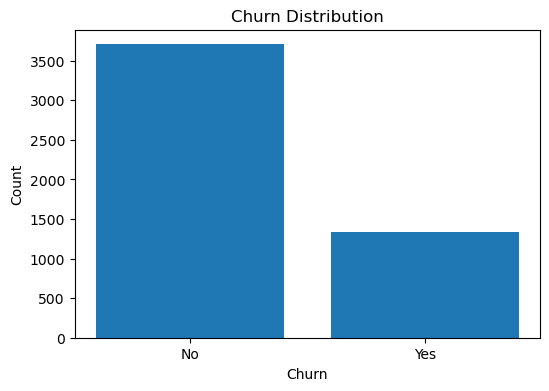

In [119]:
# Plot churn distribution
counts = df["Churn"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [127]:
def churn_rate_by(feature):
    temp = df.groupby(feature)["Churn"].apply(lambda x: (x=="Yes").mean()).sort_values(ascending=False)
    
    return temp

def plot_churn_rate(feature, top_n=20):
    rates = churn_rate_by(feature)
    if rates.shape[0] > top_n:
        rates = rates.head(top_n)

    plt.figure(figsize=(8,4))
    plt.bar(rates.index.astype(str), rates.values)
    plt.title(f"Churn Rate by {feature}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45, ha="right")
    plt.show()
    display(rates)







gender


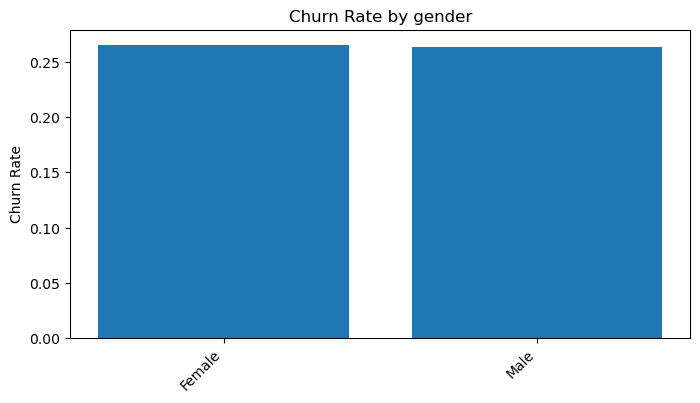

gender
Female    0.266103
Male      0.263775
Name: Churn, dtype: float64

SeniorCitizen


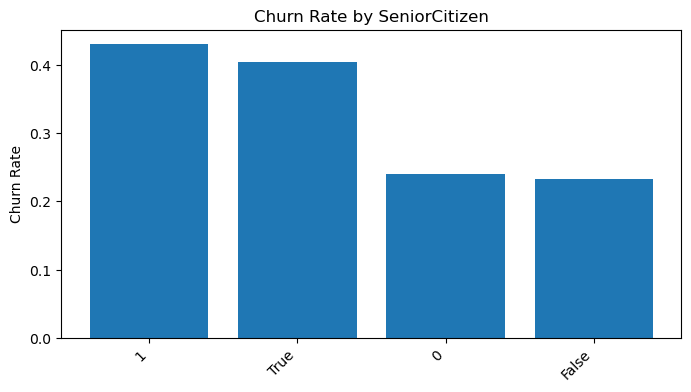

SeniorCitizen
1        0.430233
True     0.404211
0        0.240141
False    0.232871
Name: Churn, dtype: float64

Partner


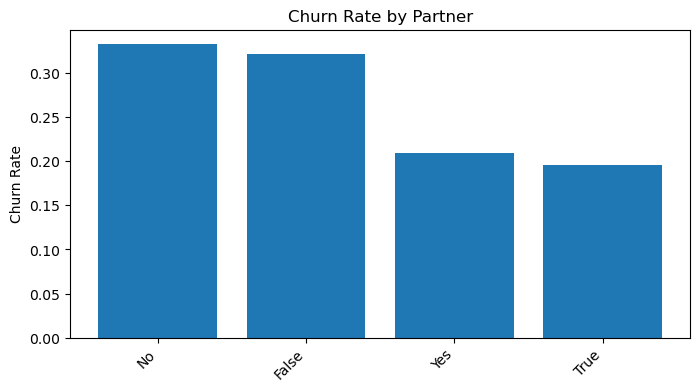

Partner
No       0.332378
False    0.321196
Yes      0.208835
True     0.195622
Name: Churn, dtype: float64

Dependents


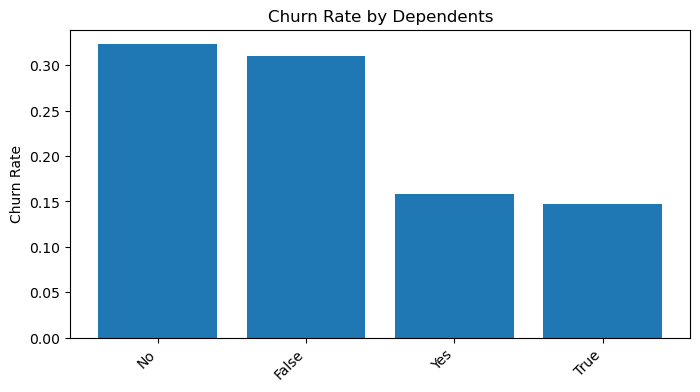

Dependents
No       0.322946
False    0.310628
Yes      0.158479
True     0.147312
Name: Churn, dtype: float64

PhoneService


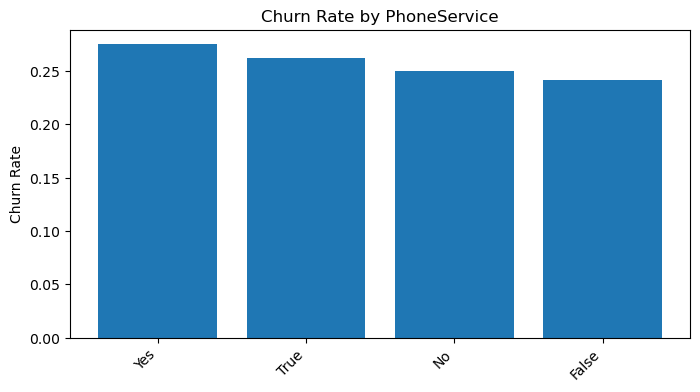

PhoneService
Yes      0.274822
True     0.261809
No       0.250000
False    0.241636
Name: Churn, dtype: float64

MultipleLines


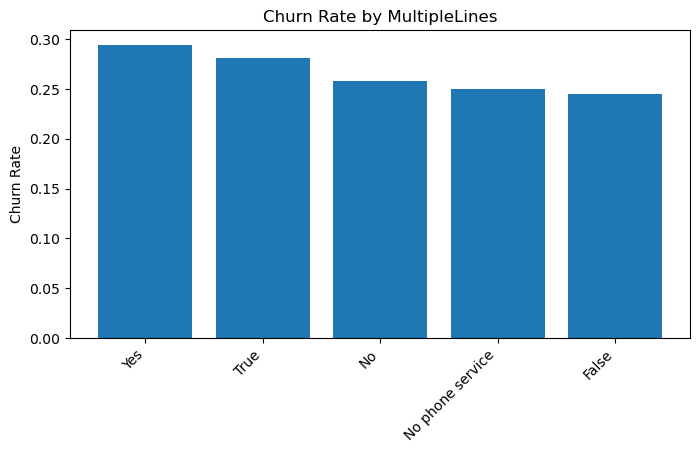

MultipleLines
Yes                 0.294258
True                0.280526
No                  0.258359
No phone service    0.250000
False               0.244955
Name: Churn, dtype: float64

InternetService


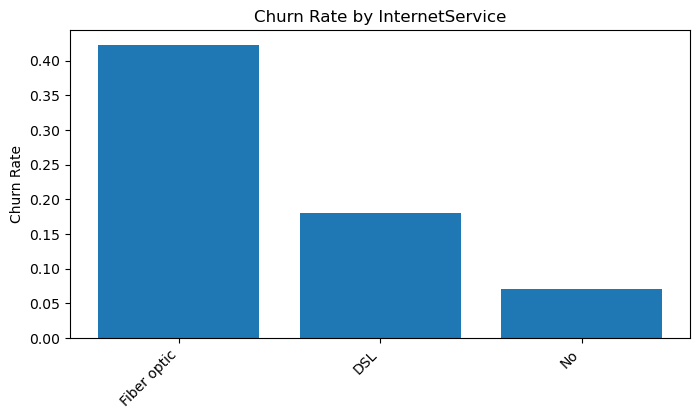

InternetService
Fiber optic    0.423043
DSL            0.180175
No             0.070370
Name: Churn, dtype: float64

OnlineSecurity


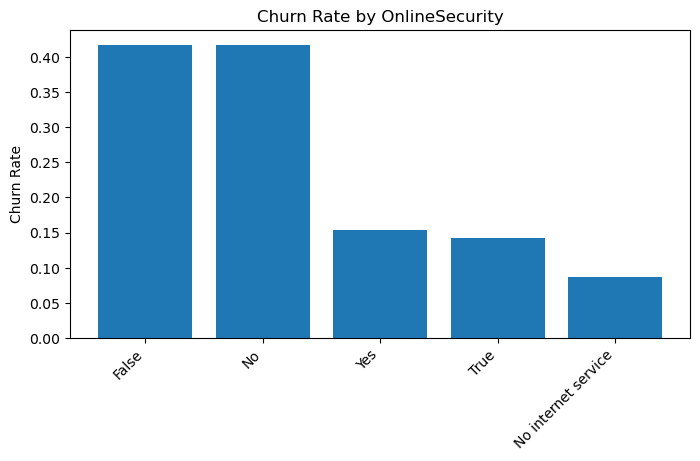

OnlineSecurity
False                  0.417456
No                     0.416910
Yes                    0.153846
True                   0.142365
No internet service    0.086247
Name: Churn, dtype: float64

OnlineBackup


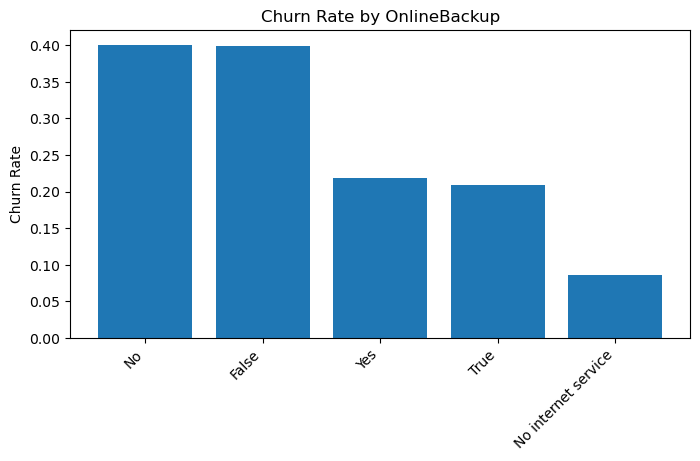

OnlineBackup
No                     0.400659
False                  0.398485
Yes                    0.219061
True                   0.208941
No internet service    0.086247
Name: Churn, dtype: float64

DeviceProtection


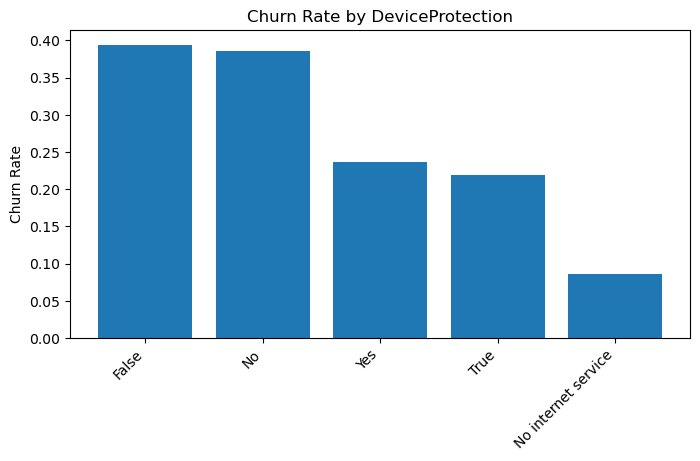

DeviceProtection
False                  0.394290
No                     0.385699
Yes                    0.235890
True                   0.218424
No internet service    0.086247
Name: Churn, dtype: float64

TechSupport


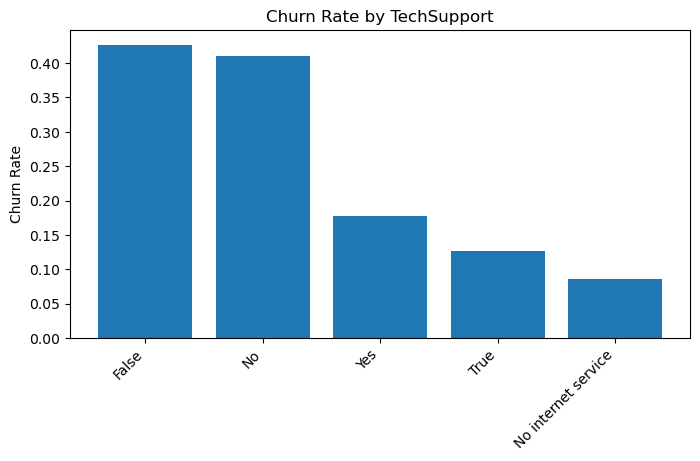

TechSupport
False                  0.426829
No                     0.410643
Yes                    0.177994
True                   0.127148
No internet service    0.086247
Name: Churn, dtype: float64

StreamingTV


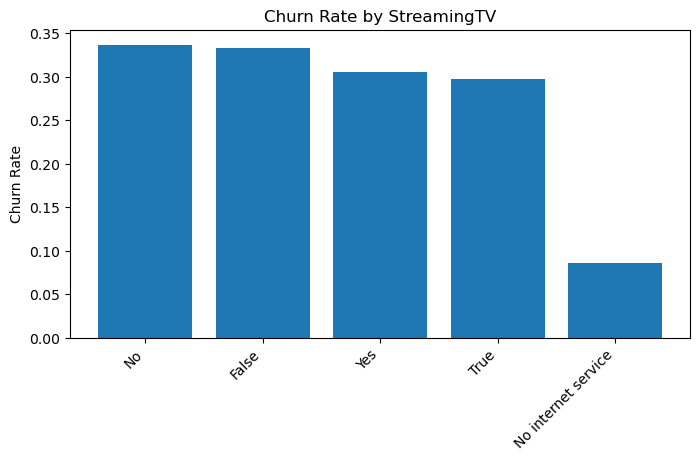

StreamingTV
No                     0.336957
False                  0.332773
Yes                    0.305344
True                   0.297670
No internet service    0.086247
Name: Churn, dtype: float64

StreamingMovies


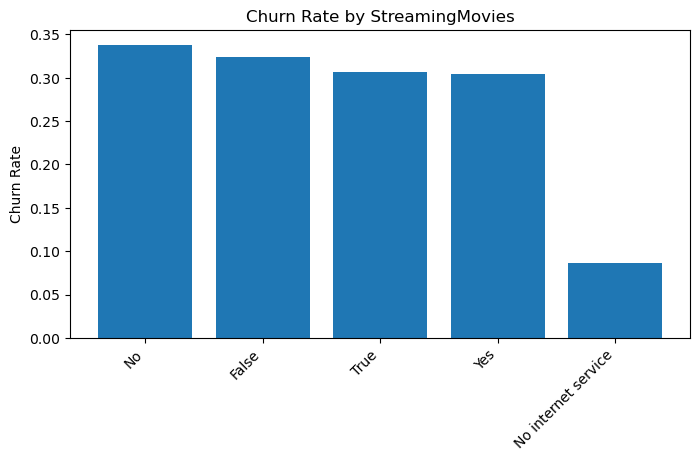

StreamingMovies
No                     0.338147
False                  0.324348
True                   0.306922
Yes                    0.303959
No internet service    0.086247
Name: Churn, dtype: float64

Contract


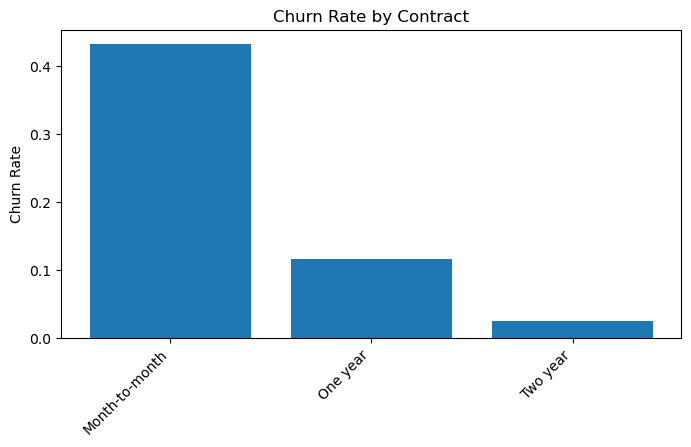

Contract
Month-to-month    0.431487
One year          0.115640
Two year          0.024116
Name: Churn, dtype: float64

PaperlessBilling


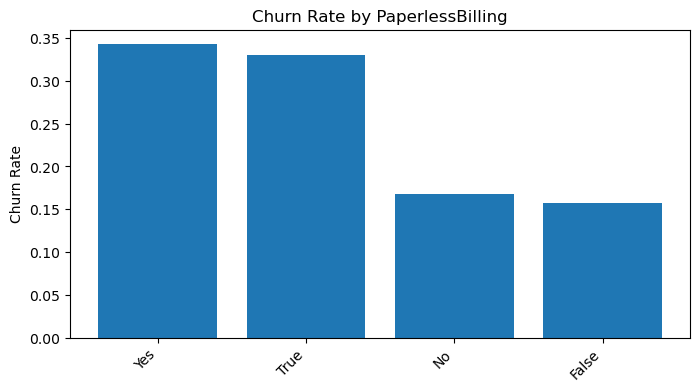

PaperlessBilling
Yes      0.342623
True     0.330518
No       0.167679
False    0.157680
Name: Churn, dtype: float64

PaymentMethod


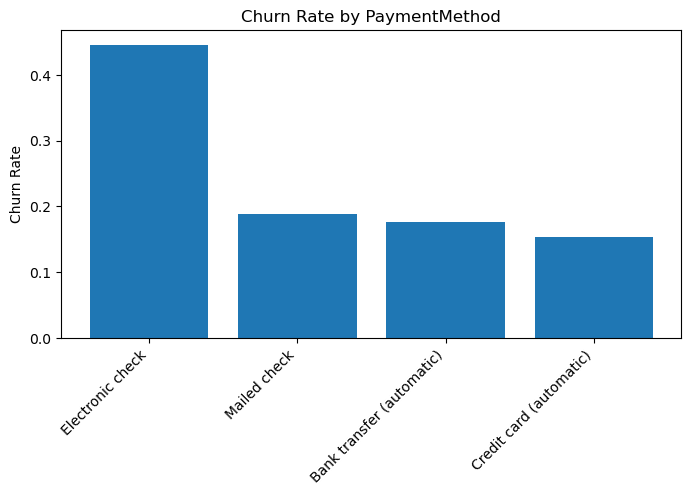

PaymentMethod
Electronic check             0.445882
Mailed check                 0.187943
Bank transfer (automatic)    0.176000
Credit card (automatic)      0.154128
Name: Churn, dtype: float64

In [129]:
cat_features = [
    "gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"
]

for col in cat_features:
    print("="*80)
    print(col)
    plot_churn_rate(col)

In [61]:
df1=pd.DataFrame()

In [89]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000
mean,32.576641,65.090214,2298.410966
std,24.529807,30.068133,2269.532701
min,0.000000,18.400000,0.000000
25%,9.000000,35.775000,415.724997
50%,29.000000,70.550003,1398.599976
75%,56.000000,90.050003,3857.575073
max,72.000000,118.650002,8670.100000


In [146]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: Churn, Length: 5043, dtype: object

In [162]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

df[df['Churn']!= 'No'][["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,1337.000000,1337.000000,1337.000000
mean,18.281975,75.236761,1571.244952
std,19.743768,24.451341,1925.794065
min,1.000000,18.850000,18.850000
25%,2.000000,59.900000,143.649994
50%,10.000000,80.050000,727.800000
75%,30.000000,94.500000,2347.899902
max,72.000000,118.350000,8127.600098


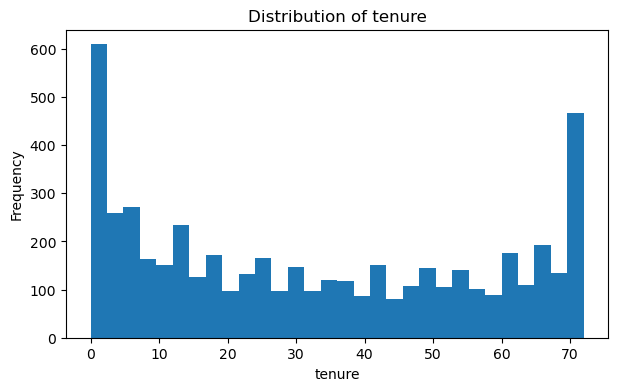

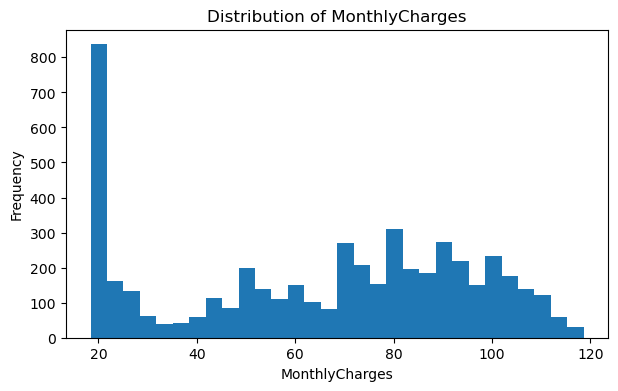

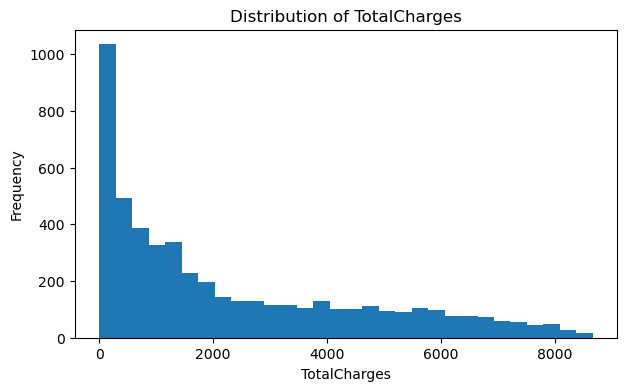

In [35]:
for col in num_features:
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\ya786\AppData\Local\Temp\ipykernel_15492\361675987.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(feature)["Churn"].apply(lambda x: (x=="Yes").mean()).sort_values(ascending=False)


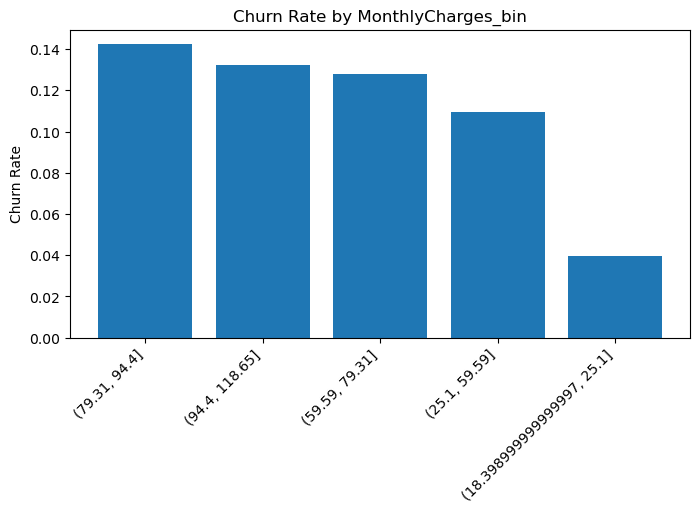

MonthlyCharges_bin
(79.31, 94.4]                 0.142292
(94.4, 118.65]                0.132338
(59.59, 79.31]                0.127849
(25.1, 59.59]                 0.109344
(18.398999999999997, 25.1]    0.039565
Name: Churn, dtype: float64

In [37]:
df["MonthlyCharges_bin"] = pd.qcut(df["MonthlyCharges"], q=5)
plot_churn_rate("MonthlyCharges_bin")

C:\Users\ya786\AppData\Local\Temp\ipykernel_15492\361675987.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(feature)["Churn"].apply(lambda x: (x=="Yes").mean()).sort_values(ascending=False)


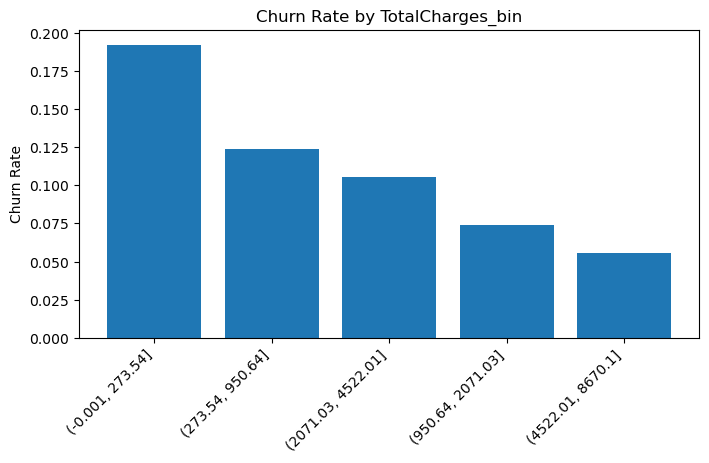

TotalCharges_bin
(-0.001, 273.54]      0.192270
(273.54, 950.64]      0.124008
(2071.03, 4522.01]    0.105159
(950.64, 2071.03]     0.074331
(4522.01, 8670.1]     0.055500
Name: Churn, dtype: float64

In [39]:
df["TotalCharges_bin"] = pd.qcut(df["TotalCharges"], q=5, duplicates="drop")
plot_churn_rate("TotalCharges_bin")

## Key Insights Summary (EDA)



In this project, I worked on a customer churn prediction problem using a telecom customer dataset containing 5,043 customer records and 22 features. The dataset includes key customer attributes such as demographics (gender, senior citizen), customer relationship indicators (partner, dependents), subscription tenure, and service usage details like internet services, online security, tech support, and streaming services.

While understanding the dataset, I observed that the data was not fully clean and required preprocessing before modeling. Some columns such as MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies had missing values. Additionally, TotalCharges was stored as object (string) and included null values, meaning it needed conversion into numeric format for machine learning. The target variable Churn also had missing values in a few rows, so those records needed careful handling.

After cleaning and preparing the data, I performed exploratory data analysis to identify churn patterns. I found that churn was particularly higher among certain customer segments, especially:
 
 -Senior citizens

-Customers who are single (no partner)

-Customers who are independent (no dependents)

-Customers with low or no Online Security, which showed a strong association with churn

These insights indicated that churn is strongly influenced not only by pricing and tenure, but also by the perceived service protection and reliability, such as security and support features. Using these findings, the objective was not just to build a churn classifier but also to understand why customers churn, enabling targeted retention strategies.



new customer only churn if they started to use their service mean the didnt churn  , low total charge customer are mostly churn